In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import netCDF4
import xarray as xr
import hmp
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
import multiprocessing
import os
import random
import mne
from tqdm.notebook import tqdm
DATA_PATH = Path(os.getenv("DATA_PATH"))

#### New version

In [2]:
sfreq = 250  # For resampling

eeg_path = DATA_PATH / "sat2/preprocessed_500hz/"
subj_names = [
    x.split("_")[0] for x in os.listdir(eeg_path)
]  # in x and 'S14' not in x] #pbm with
subj_names = [subj for subj in subj_names]
subj_names.sort()
# subj_names = [subj for subj in subj_names if 'S11' in subj]
subj_files = [str(eeg_path) + "/" + x + "_epo.fif" for x in subj_names]

Processing participant /workspace/data_local/sat2/preprocessed_500hz/S1_epo.fif's epoched eeg


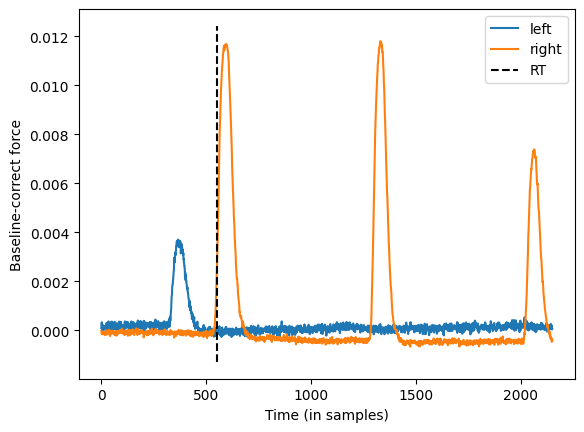

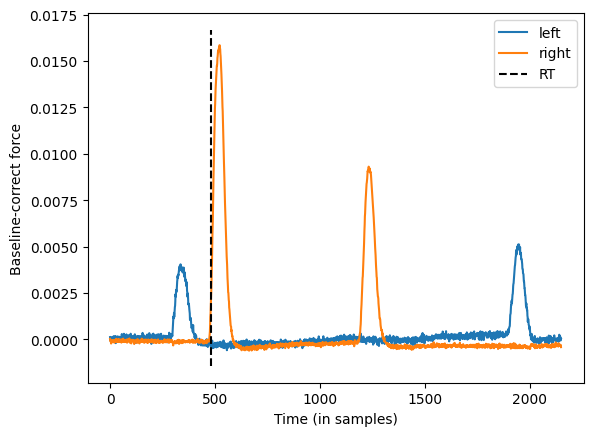

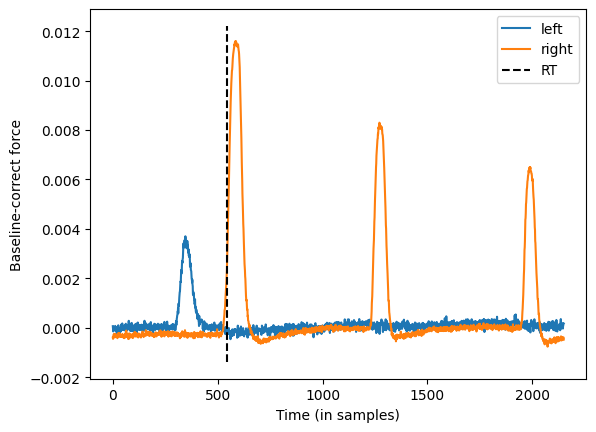

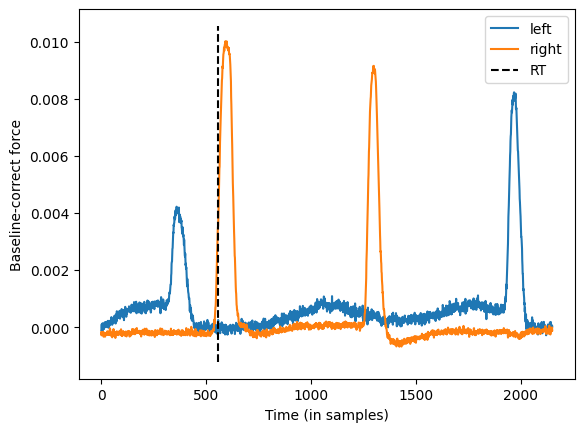

Dropped 12 epochs: 12, 23, 60, 73, 95, 183, 1327, 1340, 1371, 2023, 2096, 2099
13 trial rejected based on threshold of 0.0001
2349 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S1_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S10_epo.fif's epoched eeg


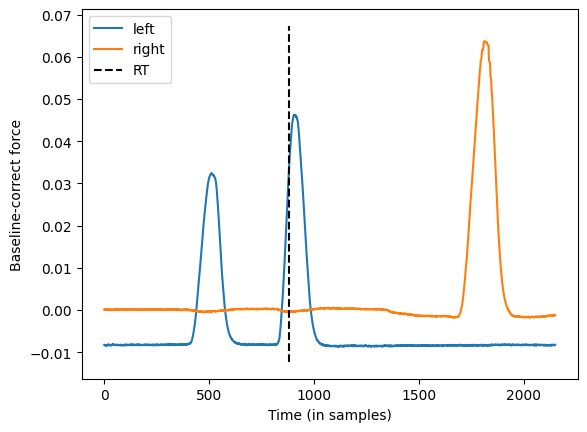

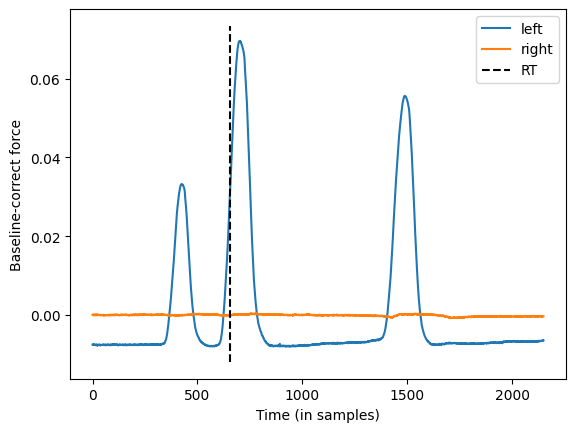

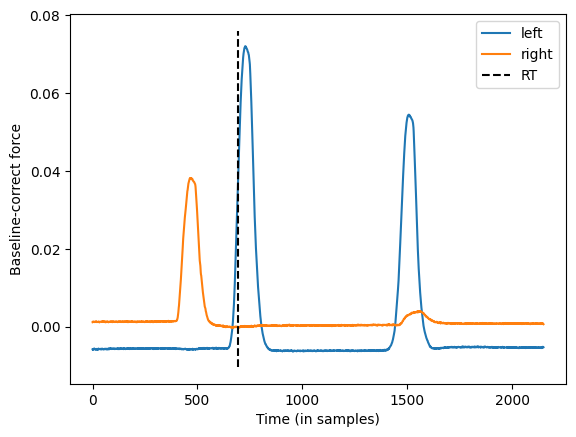

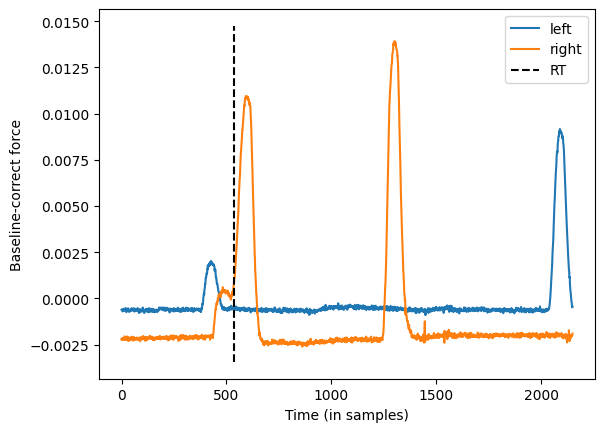

Dropped 8 epochs: 607, 1114, 1211, 1517, 1545, 2234, 2411, 2437
82 trial rejected based on threshold of 0.0001
2357 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S10_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S11_epo.fif's epoched eeg


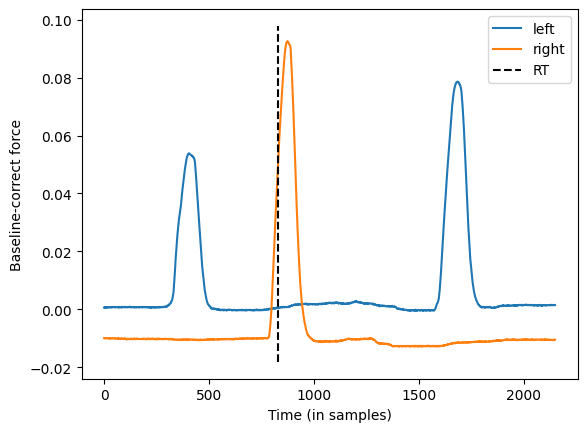

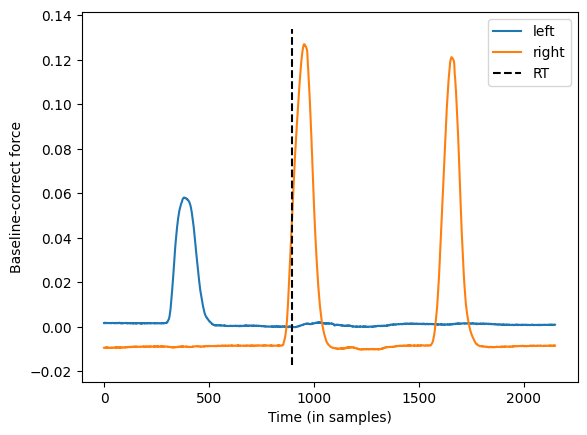

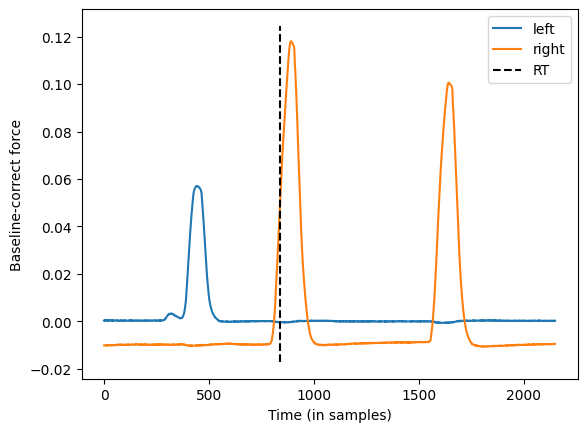

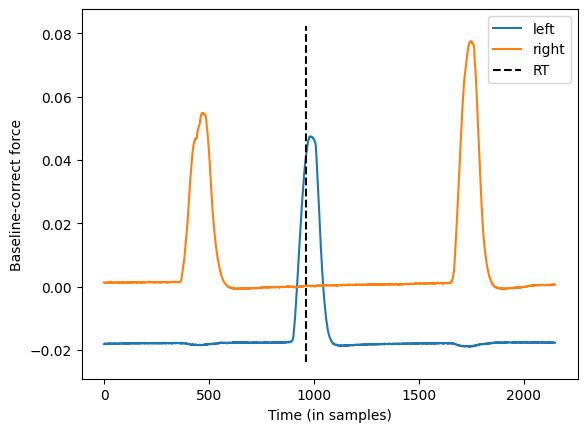

Dropped 1424 epochs: 223, 615, 635, 655, 758, 872, 904, 914, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 117

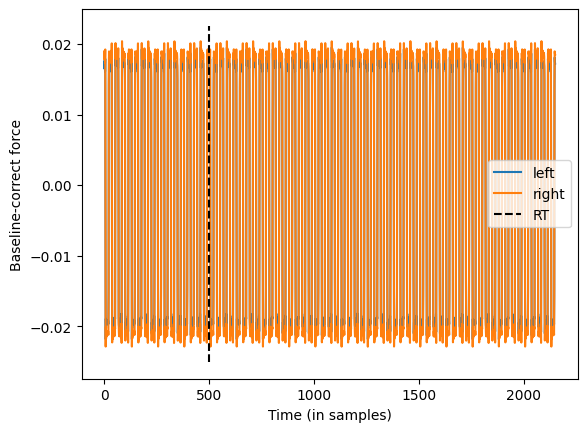

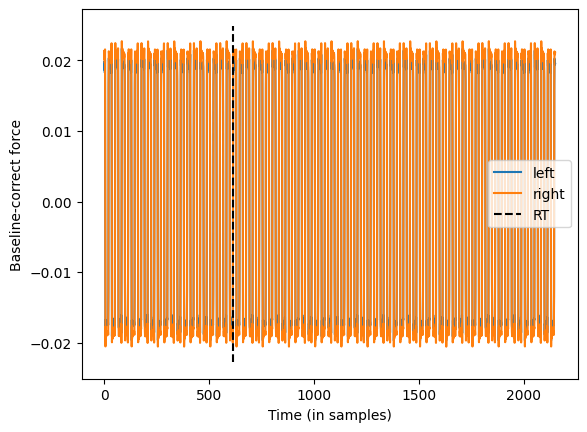

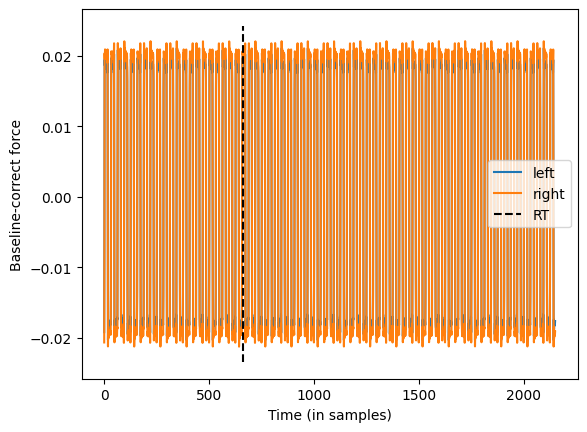

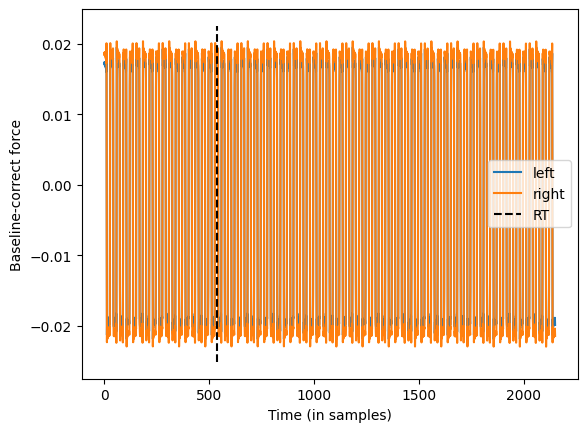

Dropped 2445 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

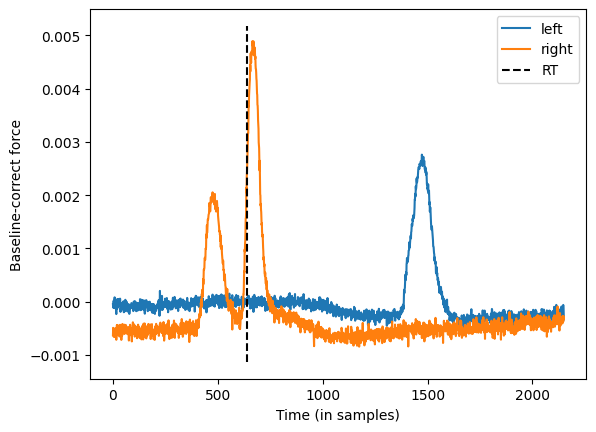

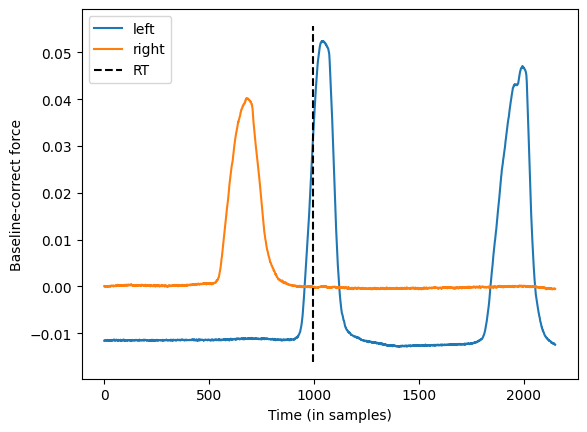

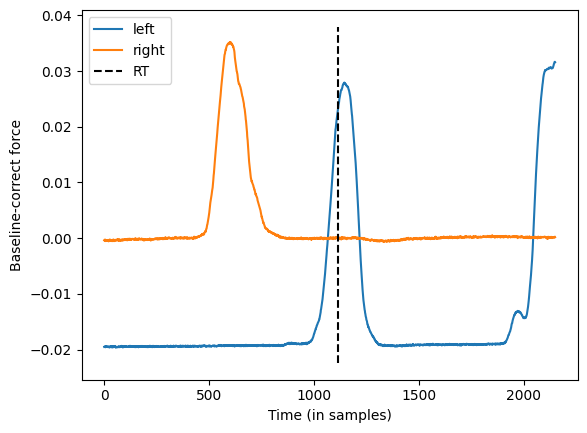

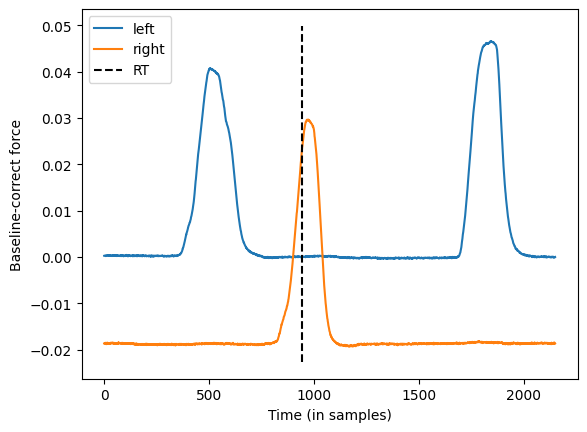

Dropped 30 epochs: 243, 339, 349, 379, 408, 423, 465, 474, 475, 499, 526, 529, 530, 553, 588, 591, 601, 921, 1110, 1545, 1589, 1691, 1710, 1743, 1760, 1809, 2171, 2176, 2178, 2220
1 trial rejected based on threshold of 0.0001
2416 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S13_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S14_epo.fif's epoched eeg


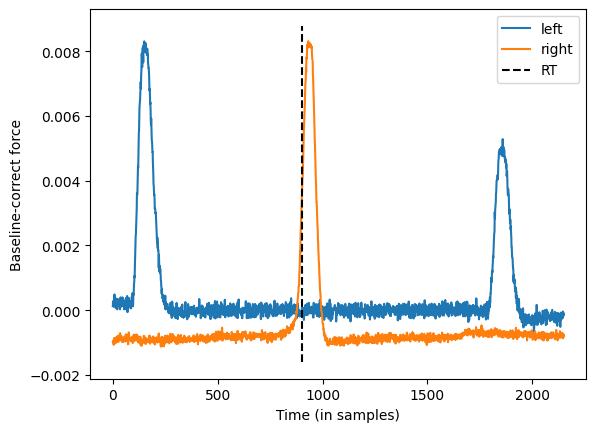

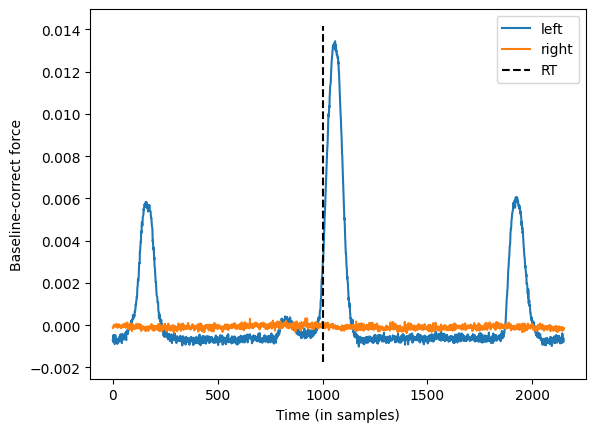

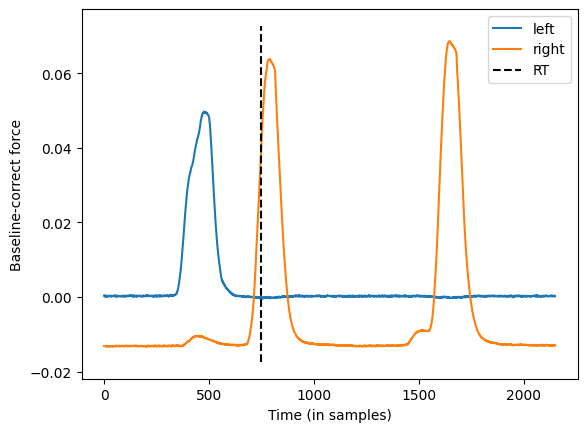

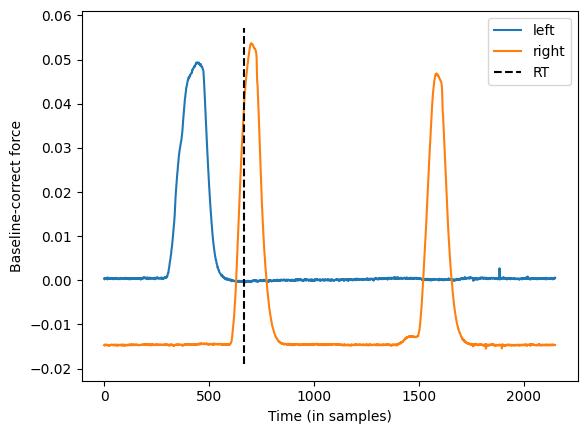

Dropped 12 epochs: 117, 197, 385, 390, 402, 405, 439, 577, 593, 1487, 1993, 2020
48 trial rejected based on threshold of 0.0001
2388 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S14_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S15_epo.fif's epoched eeg


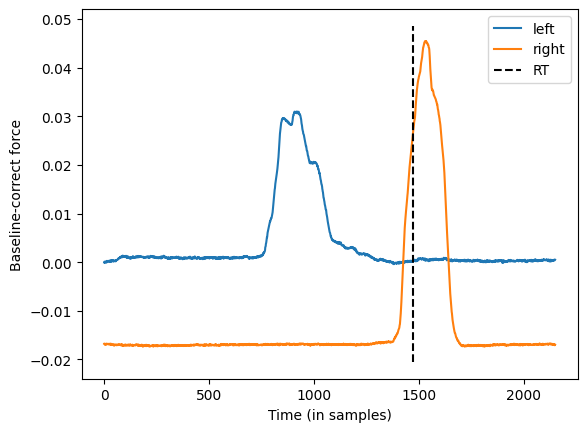

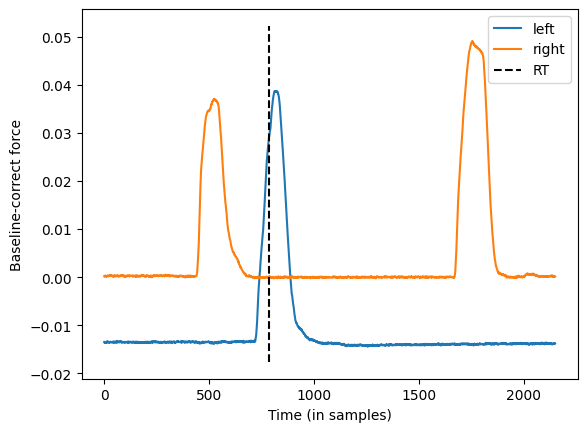

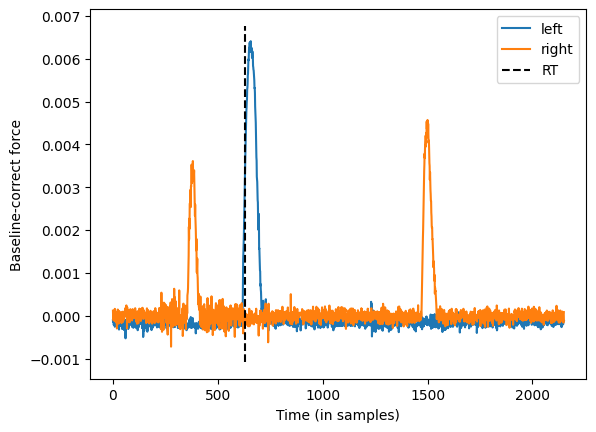

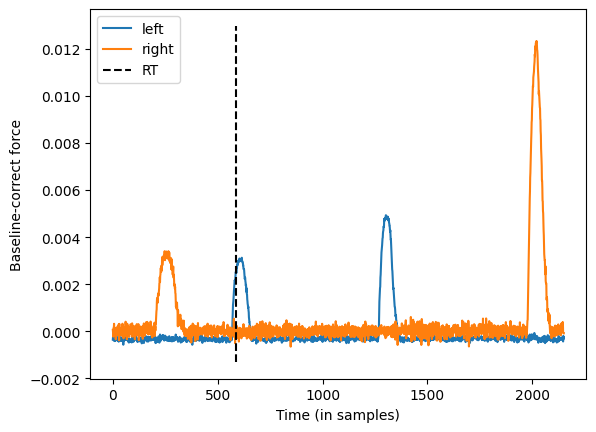

Dropped 5 epochs: 4, 146, 1580, 1822, 2326
5 trial rejected based on threshold of 0.0001
2438 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S15_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S16_epo.fif's epoched eeg


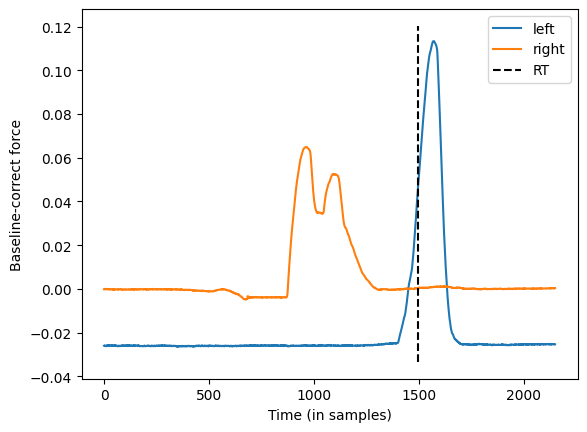

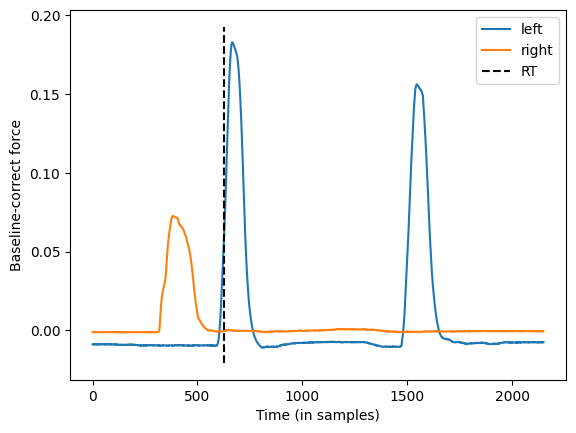

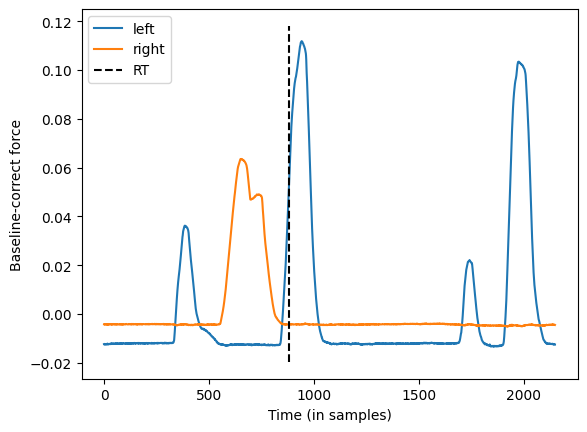

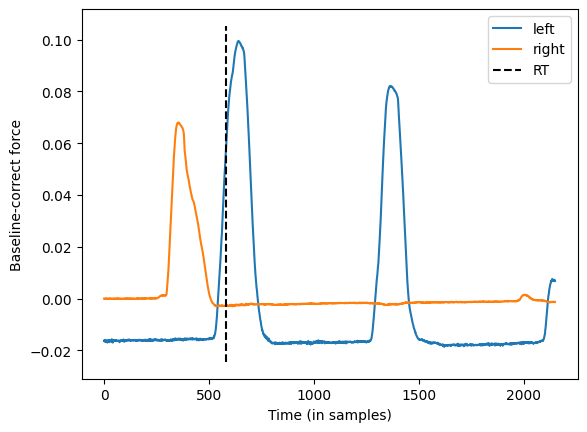

Dropped 30 epochs: 99, 199, 237, 277, 412, 415, 419, 522, 528, 592, 593, 594, 698, 756, 791, 873, 919, 959, 1369, 1500, 1504, 1522, 1526, 1529, 1735, 1736, 1737, 2092, 2096, 2209
26 trial rejected based on threshold of 0.0001
2291 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S16_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S17_epo.fif's epoched eeg


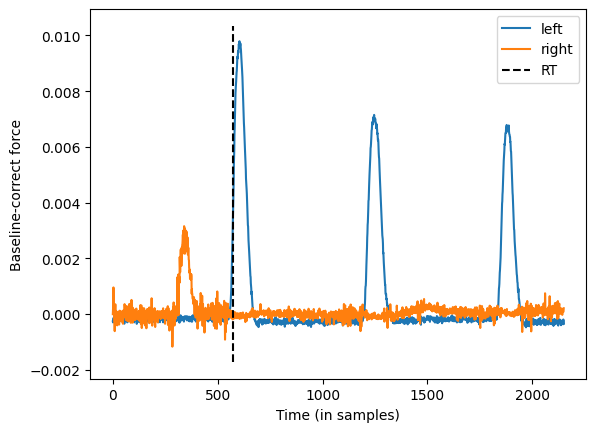

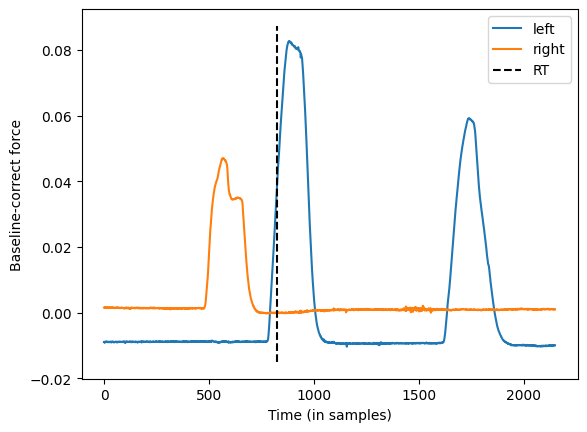

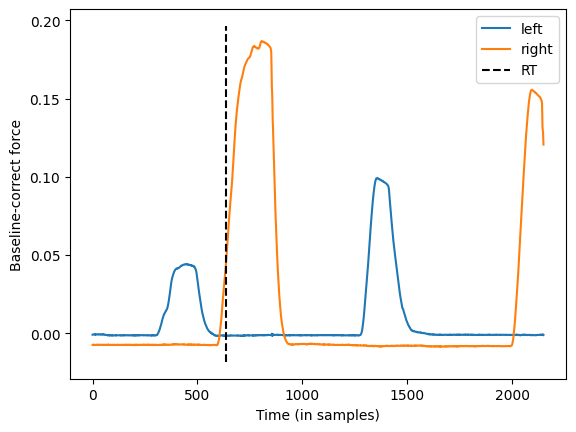

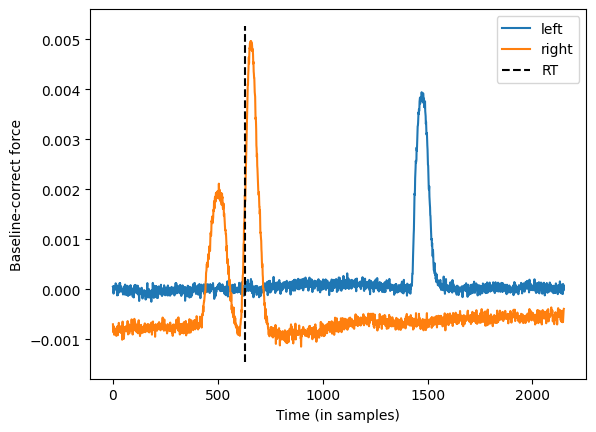

Dropped 14 epochs: 137, 362, 603, 721, 754, 1096, 1586, 1693, 1712, 1816, 2121, 2144, 2218, 2437
30 trial rejected based on threshold of 0.0001
2398 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S17_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S18_epo.fif's epoched eeg


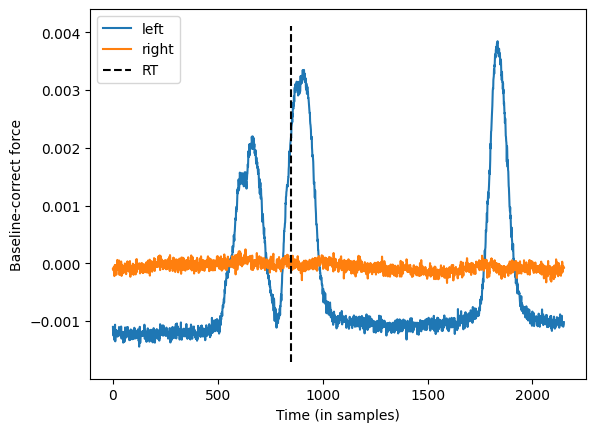

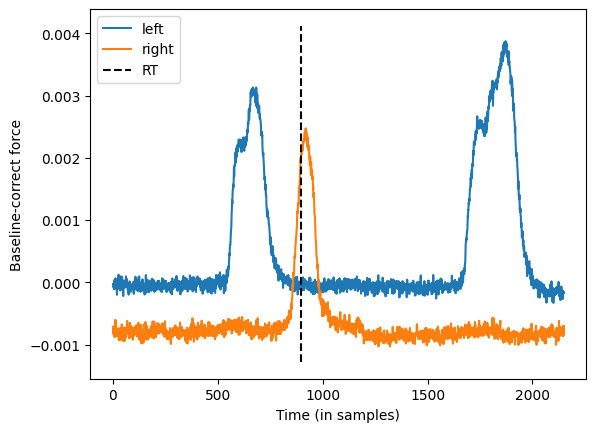

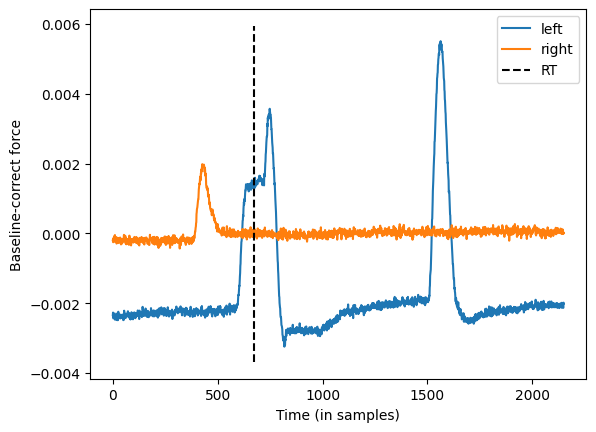

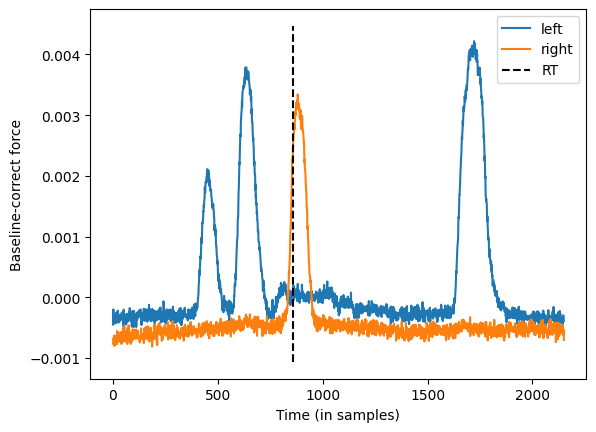

Dropped 42 epochs: 120, 123, 215, 219, 291, 315, 342, 370, 399, 416, 430, 448, 488, 543, 548, 556, 559, 572, 786, 950, 957, 993, 1001, 1033, 1041, 1051, 1065, 1092, 1168, 1191, 1195, 1200, 1558, 1622, 1642, 1973, 2245, 2278, 2325, 2370, 2383, 2386
9 trial rejected based on threshold of 0.0001
2397 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S18_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S2_epo.fif's epoched eeg


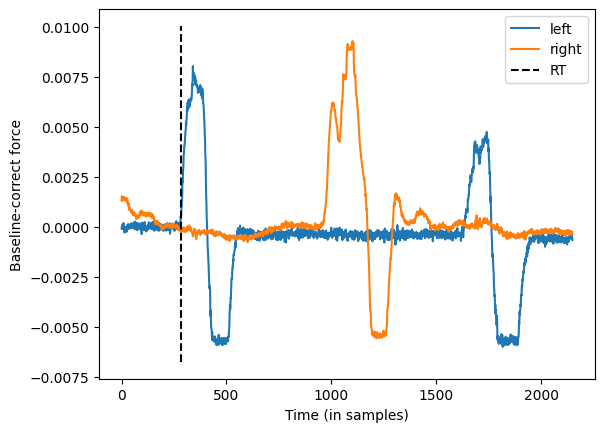

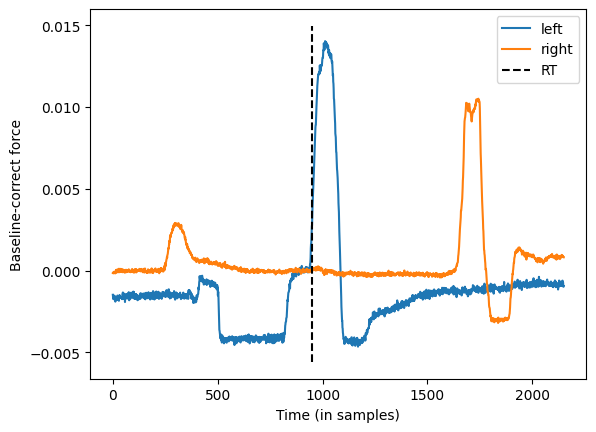

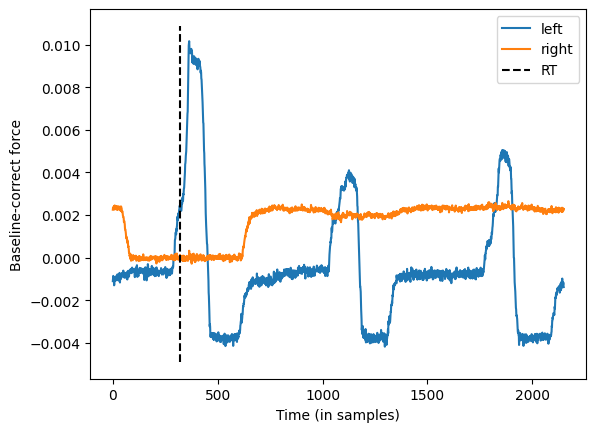

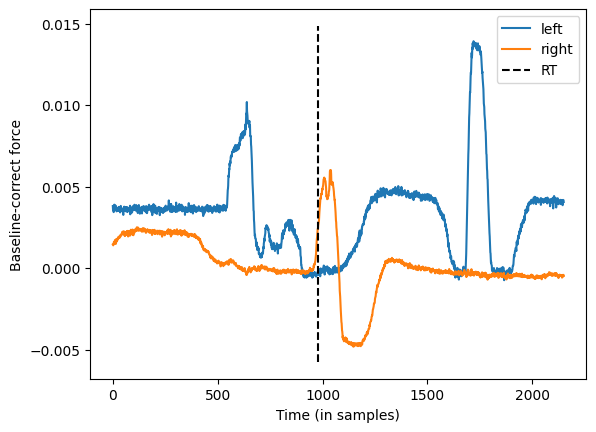

Dropped 17 epochs: 98, 152, 160, 231, 232, 808, 811, 812, 825, 846, 1280, 1281, 1282, 1332, 1914, 1947, 1948
685 trial rejected based on threshold of 0.0001
1741 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S2_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S20_epo.fif's epoched eeg


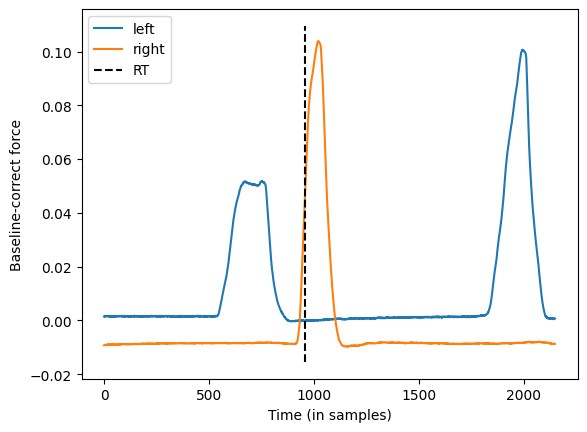

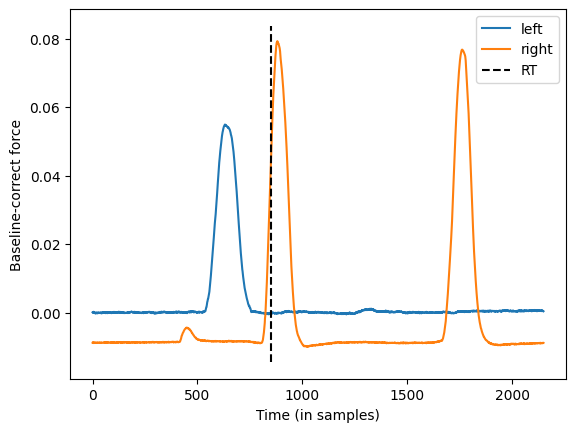

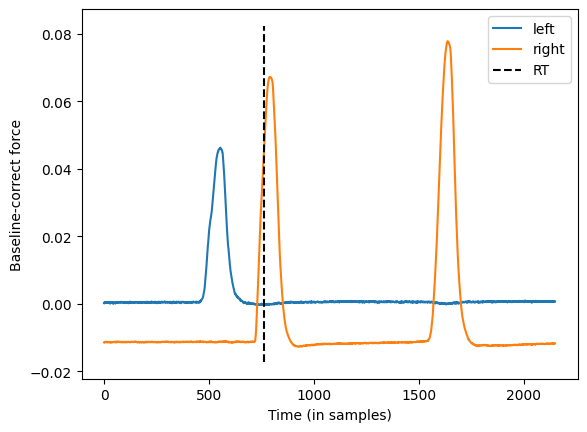

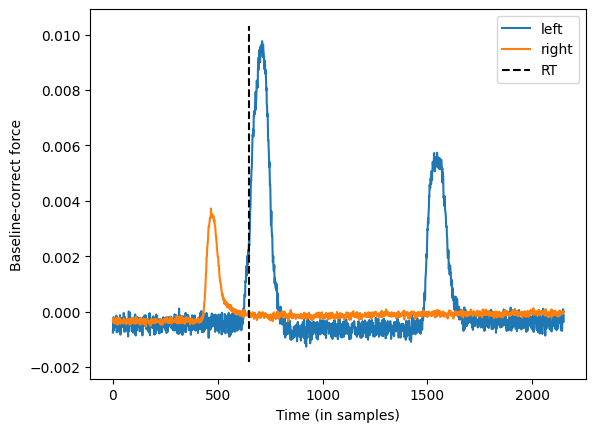

Dropped 26 epochs: 104, 160, 293, 530, 582, 643, 657, 664, 669, 735, 740, 784, 1046, 1105, 1109, 1155, 1234, 1256, 1302, 1480, 1597, 1974, 2007, 2155, 2285, 2425
37 trial rejected based on threshold of 0.0001
2378 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S20_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S3_epo.fif's epoched eeg


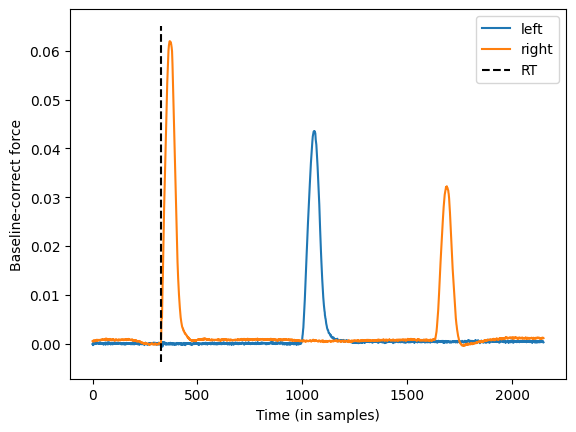

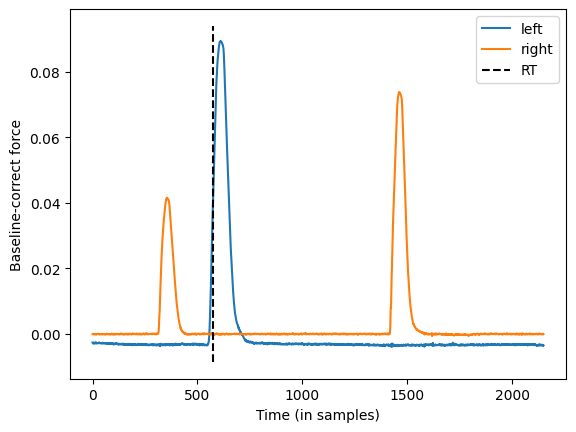

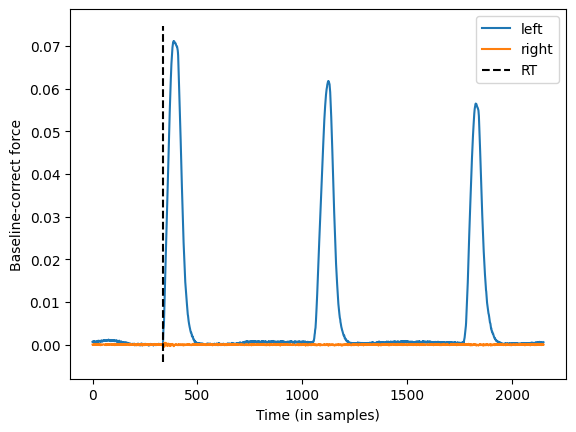

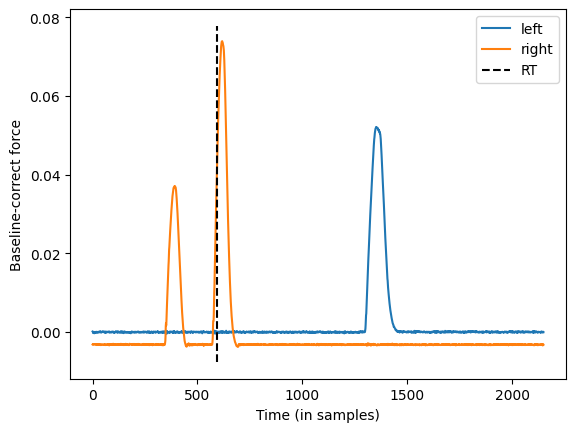

Dropped 10 epochs: 411, 852, 935, 1377, 1525, 1680, 2035, 2050, 2083, 2134
11 trial rejected based on threshold of 0.0001
2419 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S3_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S4_epo.fif's epoched eeg


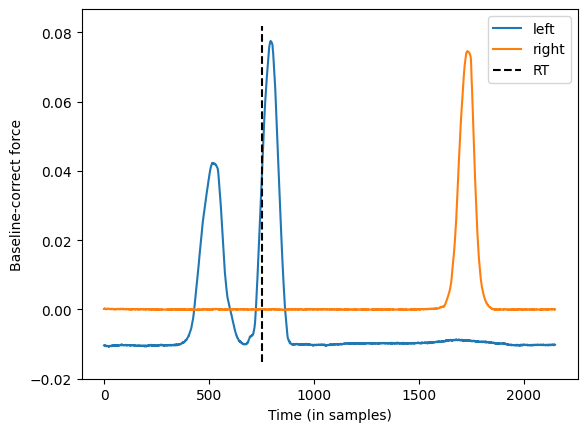

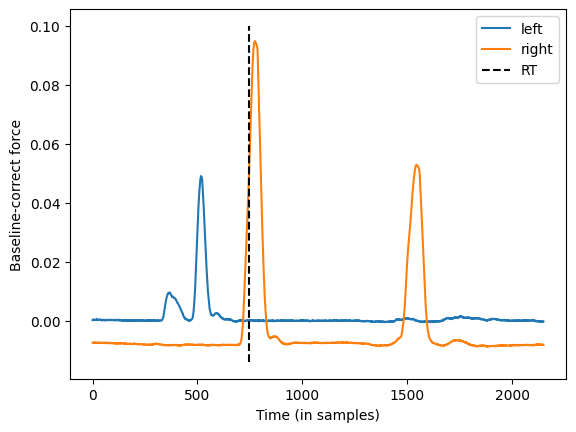

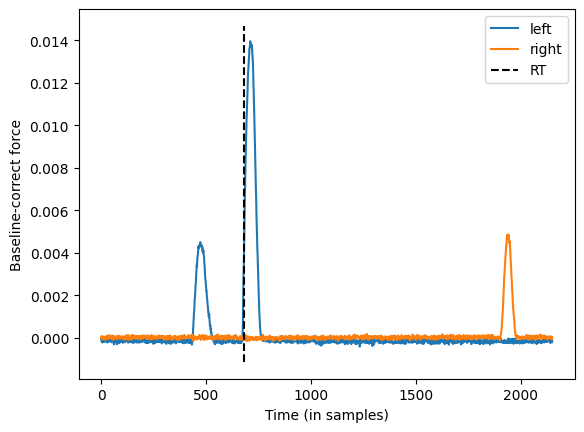

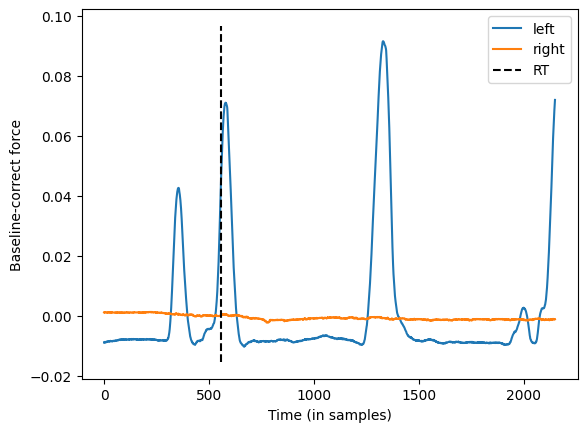

Dropped 26 epochs: 150, 298, 436, 615, 622, 715, 731, 746, 753, 797, 809, 899, 1086, 1135, 1319, 1346, 1429, 1442, 1480, 1842, 2030, 2034, 2084, 2139, 2356, 2360
434 trial rejected based on threshold of 0.0001
1988 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S4_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S5_epo.fif's epoched eeg


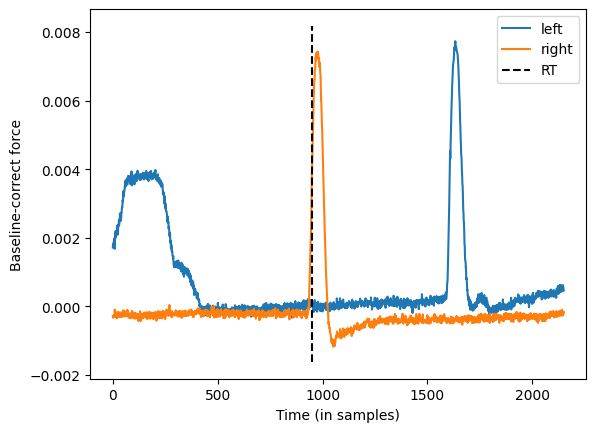

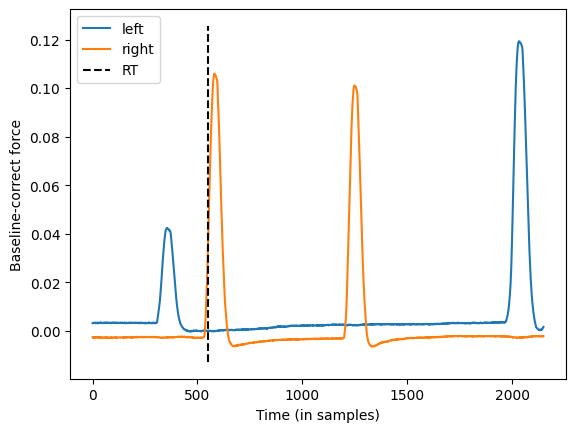

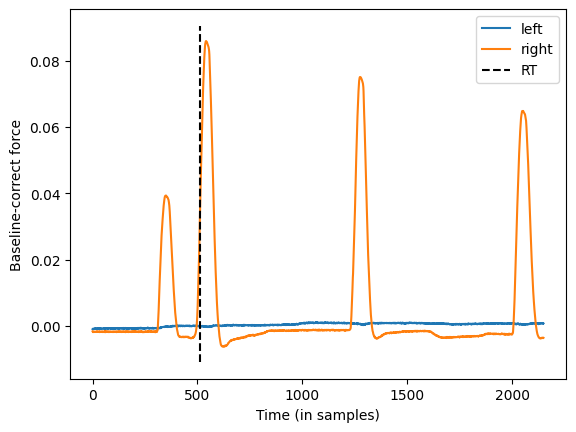

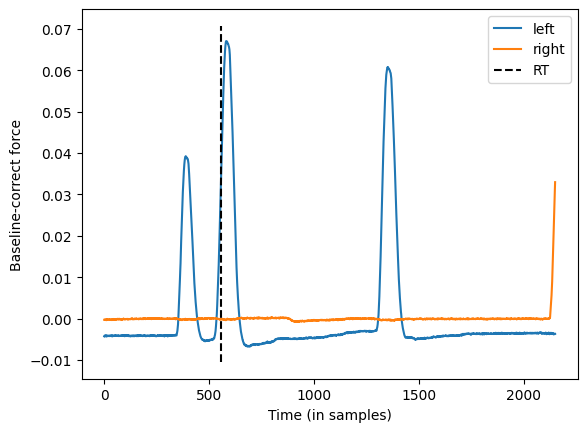

Dropped 11 epochs: 40, 527, 559, 575, 934, 951, 1376, 1555, 1839, 1886, 2143
9 trial rejected based on threshold of 0.0001
2427 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S5_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S6_epo.fif's epoched eeg


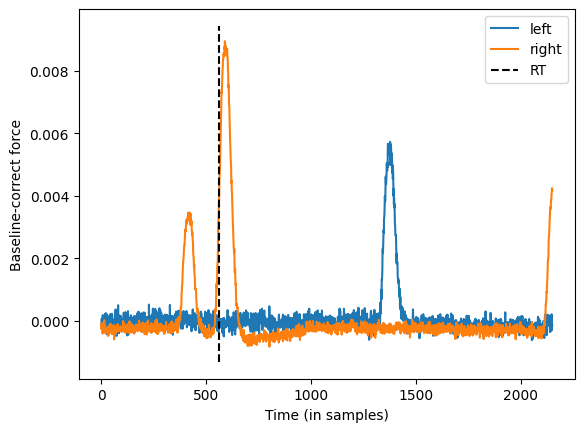

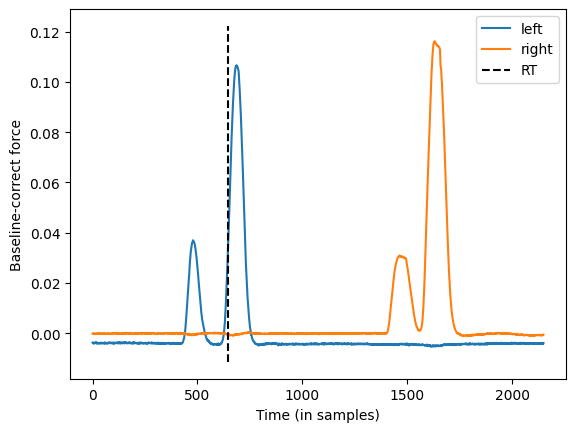

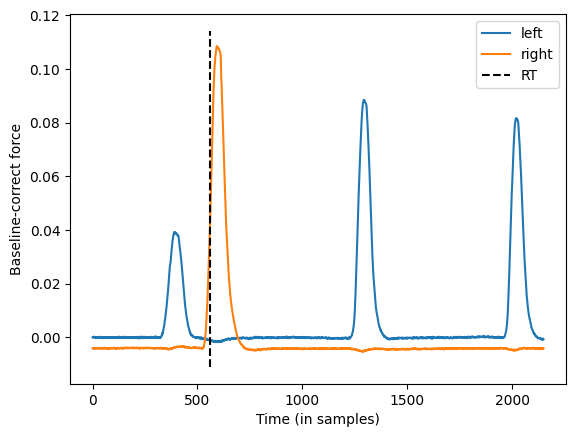

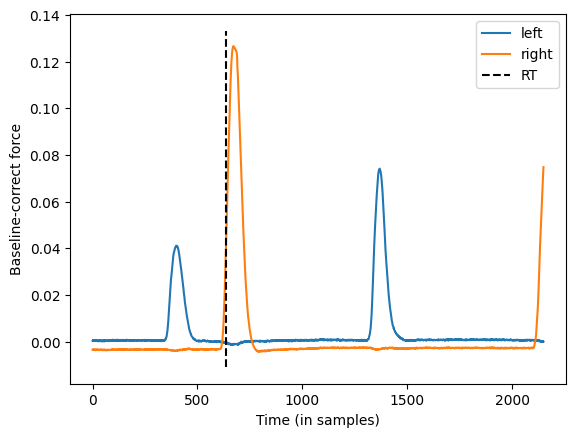

Dropped 56 epochs: 22, 335, 343, 372, 404, 436, 564, 634, 643, 671, 672, 681, 687, 703, 714, 715, 716, 717, 718, 719, 720, 721, 724, 731, 733, 735, 749, 772, 948, 949, 950, 951, 952, 953, 954, 955, 958, 959, 961, 962, 964, 965, 966, 967, 969, 970, 971, 972, 973, 974, 1104, 1137, 1196, 1587, 1689, 2281
56 trial rejected based on threshold of 0.0001
2335 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S6_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S7_epo.fif's epoched eeg


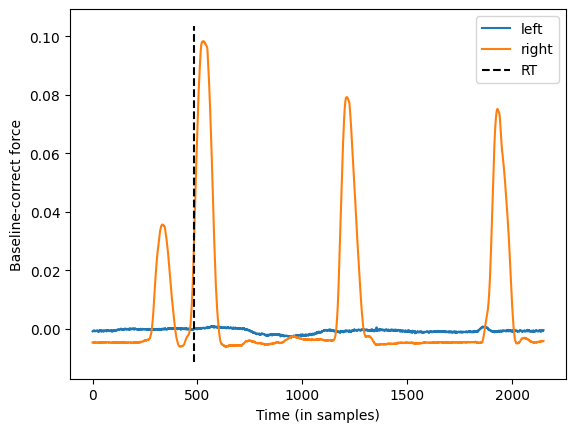

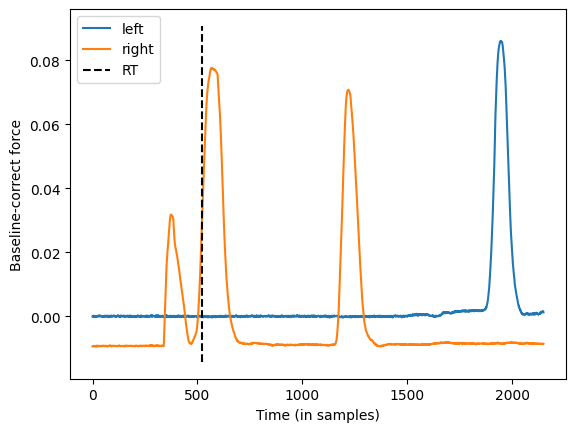

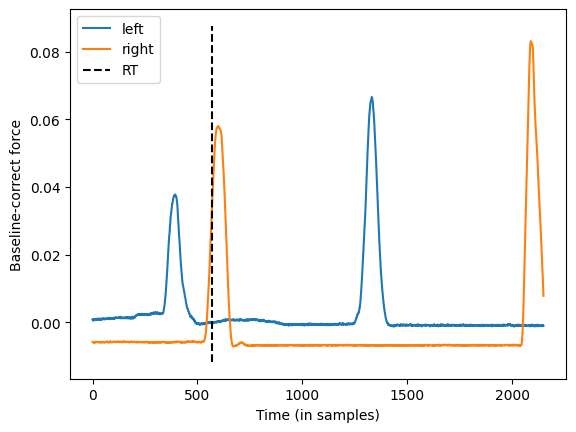

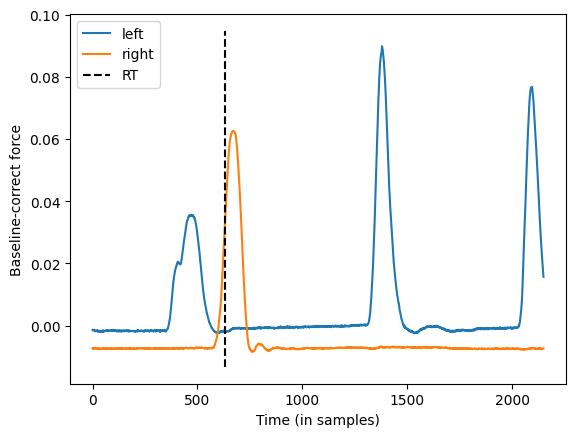

Dropped 38 epochs: 20, 78, 134, 138, 288, 558, 593, 610, 654, 751, 866, 870, 1246, 1260, 1261, 1275, 1284, 1286, 1293, 1298, 1304, 1327, 1459, 1502, 1575, 1648, 1655, 1684, 1703, 1704, 1717, 1758, 1782, 1785, 1825, 2076, 2081, 2249
84 trial rejected based on threshold of 0.0001
2284 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S7_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S8_epo.fif's epoched eeg


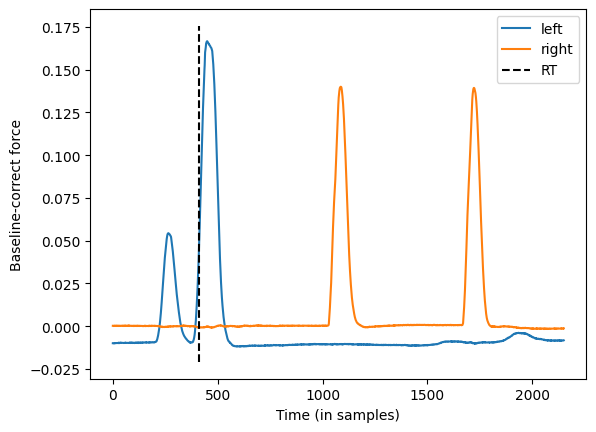

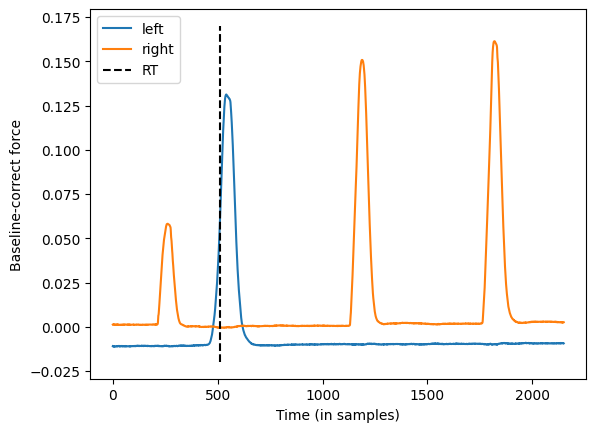

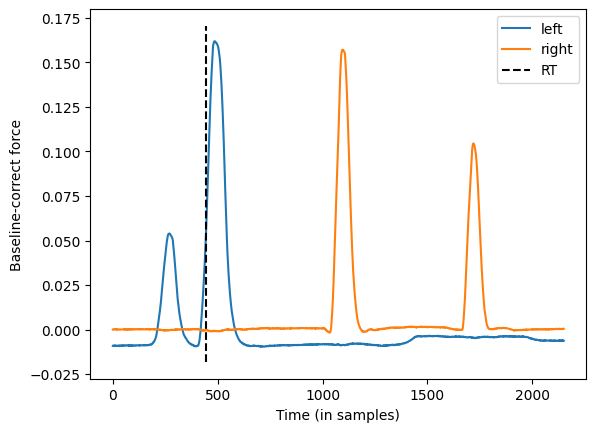

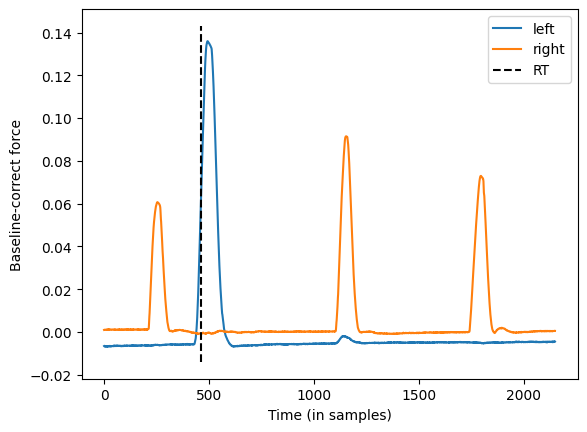

Dropped 21 epochs: 648, 663, 669, 677, 684, 741, 761, 1194, 1384, 1466, 1499, 1507, 1663, 1845, 1859, 1864, 1911, 2069, 2074, 2247, 2437
177 trial rejected based on threshold of 0.0001
2243 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S8_epo.fif
Processing participant /workspace/data_local/sat2/preprocessed_500hz/S9_epo.fif's epoched eeg


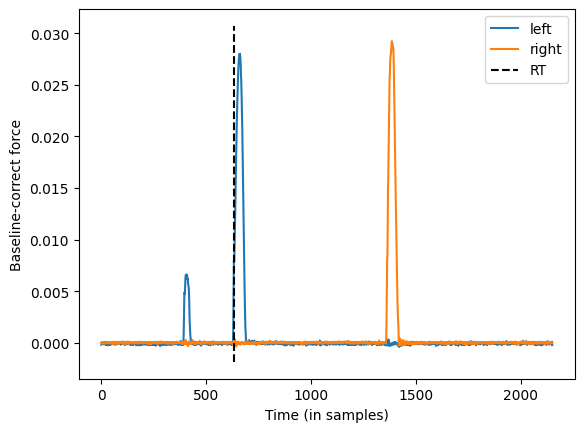

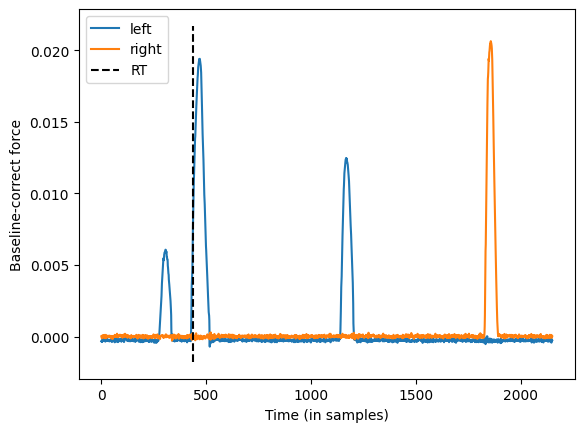

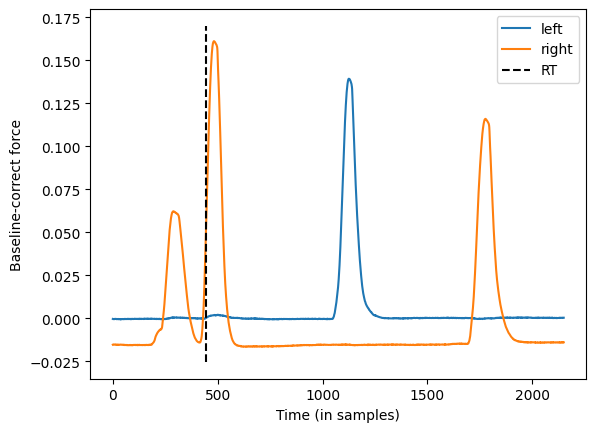

Dropped 3 epochs: 127, 849, 1765
14 trial rejected based on threshold of 0.0001
2431 trials were retained for participant /workspace/data_local/sat2/preprocessed_500hz/S9_epo.fif


In [5]:
epoch_data = hmp.utils.read_mne_data(
    subj_files,
    epoched=True,
    sfreq=sfreq,
    rt_col="rt",
    scale=1,
    lower_limit_RT=0.1,
    # upper_limit_RT=2.5,
    reject_threshold=1e-4,
    high_pass=1,
    verbose=False,
    subj_idx=subj_names,
    offset_after_resp=0.25,
    offset_before_stim=0.25,
    drop_force=True,
)
# Change epoch_data.offset to 0.05 seconds (12 samples), and add epoch_data.extra_offset with remainder
tmp_offset = epoch_data.offset
epoch_data = epoch_data.assign_attrs({'offset': 0, 'extra_offset': tmp_offset - 0})

In [4]:
# epoch_data = epoch_data.where(epoch_data["force"] == "low", drop=True)

In [14]:
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_250hz_long.nc')

#### DEPRECATED

In [ ]:
# cpus = multiprocessing.cpu_count()
# print(cpus)
# cpus = 1  # if not enough RAM to load all participants data, better reduce the number of processes

force_id = {"low": 1, "high": 2}
stim_id = {
    "accuracy/left/1": 211,
    "accuracy/left/2": 212,
    "accuracy/left/3": 213,
    "accuracy/right/1": 221,
    "accuracy/right/2": 222,
    "accuracy/right/3": 223,
    "speed/left/1": 111,
    "speed/left/2": 112,
    "speed/left/3": 113,  # conditions in the experiment
    "speed/right/1": 121,
    "speed/right/2": 122,
    "speed/right/3": 123,
}  # used for segmentation
resp_id = {"r_left": 100, "r_right": 200}  # Response events
# COMmenting low out might filter out low but also might mess up later
event_id = {
    "low/accuracy/left/1": 1211,
    "low/accuracy/left/2": 1212,
    "low/accuracy/left/3": 1213,
    "low/accuracy/right/1": 1221,
    "low/accuracy/right/2": 1222,
    "low/accuracy/right/3": 1223,
    "low/speed/left/1": 1111,
    "low/speed/left/2": 1112,
    "low/speed/left/3": 1113,  # conditions in the experiment
    "low/speed/right/1": 1121,
    "low/speed/right/2": 1122,
    "low/speed/right/3": 1123,
    "high/accuracy/left/1": 2211,
    "high/accuracy/left/2": 2212,
    "high/accuracy/left/3": 2213,
    "high/accuracy/right/1": 2221,
    "high/accuracy/right/2": 2222,
    "high/accuracy/right/3": 2223,
    "high/speed/left/1": 2111,
    "high/speed/left/2": 2112,
    "high/speed/left/3": 2113,  # conditions in the experiment
    "high/speed/right/1": 2121,
    "high/speed/right/2": 2122,
    "high/speed/right/3": 2123,
}

sfreq = 250  # For resampling

eeg_path = DATA_PATH / "sat2/preprocessed_500hz/"
subj_names = [
    x.split("_")[0] for x in os.listdir(eeg_path)
]  # in x and 'S14' not in x] #pbm with
subj_names = [subj for subj in subj_names]
subj_names.sort()
subj_files = [str(eeg_path) + "/" + x + "_epo.fif" for x in subj_names]
# Filter out first two participants for testing

#### ALL PARTICIPANTS

In [9]:
epoch_data

<xarray.Dataset> Size: 25GB
Dimensions:      (participant: 19, epochs: 2448, channels: 64, samples: 1049)
Coordinates: (12/13)
  * epochs       (epochs) int64 20kB 0 1 2 3 4 5 ... 2443 2444 2445 2446 2447
  * channels     (channels) <U3 768B 'Fp1' 'AF7' 'AF3' 'F1' ... 'PO8' 'PO4' 'O2'
  * samples      (samples) int64 8kB 0 1 2 3 4 5 ... 1044 1045 1046 1047 1048
    event_name   (participant, epochs) object 372kB 'stim/low/speed/right/3' ...
    rt           (participant, epochs) float64 372kB 0.468 0.408 ... 1.014 0.504
    stimulus     (participant, epochs) object 372kB 'low/speed/right/3' ... '...
    ...           ...
    prefix       (participant, epochs) object 372kB 'stim' 'stim' ... 'stim'
    force        (participant, epochs) object 372kB 'low' 'low' ... 'high'
    condition    (participant, epochs) object 372kB 'speed' ... 'accuracy'
    side         (participant, epochs) object 372kB 'right' 'right' ... 'right'
    contrast     (participant, epochs) object 372kB '3' '1' '2' ... '1' '3' '1'
  * participant  (participant) <U3 228B 'S1' 'S10' 'S11' ... 'S7' 'S8' 'S9'
Data variables:
    data         (participant, epochs, channels, samples) float64 25GB 8.86e-...
Attributes:
    sfreq:           250.0
    offset:          0
    offset_before:   62
    lowpass:         50.0
    highpass:        1.0
    lower_limit_RT:  0.1
    upper_limit_RT:  3.754
    extra_offset:    62

In [2]:
epoch_data = xr.load_dataset(DATA_PATH / 'sat2/data_250hz.nc')

In [4]:
new_data = epoch_data.where(epoch_data['force'] == 'low', drop=True)

In [5]:
new_data.to_netcdf(DATA_PATH / 'sat2/data_250hz_low.nc')

In [ ]:
# CHECK IF S14 loaded in has significantly less trials (25%)

In [ ]:
# save_file = "epoch_data_FEEG_500Hz.nc"
events_corrected = []
epoch_data = []
#subset subj_files for smaller group
for participant in tqdm(subj_files):
    raw = mne.io.read_raw_fif(participant, preload=False, verbose=False)
    events = mne.find_events(raw, verbose=False)
    events[:, 2] = events[:, 2] - events[:, 1]  # correct events values
    i = 0
    while i < len(events):
        if events[i, 2] in force_id.values():  # if events is condition trigger
            events[i + 1, 2] = int(
                str(events[i, 2]) + str(events[i + 1, 2])
            )  # places condition trigger on stimulus trigger (no photodiode used yet)
            events[i, 2] = 0
            i += 2
        else:
            i += 1
    events_values = np.concatenate(
        [
            np.array([x for x in event_id.values()]),
            np.array([x for x in resp_id.values()]),
        ]
    )
    events_wresp = np.array([list(x) for x in events if x[2] in events_values])
    events_corrected.append(events_wresp)
    # print("Starting mp now")
    epoch_data_participant = hmp.utils.read_mne_data(
        pfiles=participant,
        event_id=event_id,
        resp_id=resp_id,
        epoched=False,
        sfreq=sfreq,
        subj_idx=None,
        metadata=None,
        events_provided=events_wresp,
        rt_col="rt",
        rts=None,
        verbose=True,
        tmin=-0.25,
        tmax=2.5,
        offset_after_resp=0.30,
        offset_before_stim=0.25,
        high_pass=1,
        low_pass=None,
        pick_channels="eeg",
        baseline=(None, 0),
        upper_limit_RT=2.5,
        lower_limit_RT=0.25,
    )
    epoch_data.append(epoch_data_participant)
del events, events_wresp, events_values, events_corrected

epoch_data = xr.concat(
    epoch_data,
    pd.Series(subj_names, name="participant"),
    fill_value={"event": "", "data": np.nan},
)
# Change epoch_data.offset to 0.05 seconds (12 samples), and add epoch_data.extra_offset with remainder
tmp_offset = epoch_data.offset
epoch_data = epoch_data.assign_attrs({'offset': 12, 'extra_offset': tmp_offset - 12})

In [9]:
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_250hz_filtered.nc')

#### FIRST NINE

In [18]:
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_250hz_part1.nc')

In [4]:
epoch_data_sat1 = xr.load_dataset(DATA_PATH / 'sat1/data_100hz.nc')
epoch_data_sat1

<xarray.Dataset>
Dimensions:      (epochs: 200, channels: 30, samples: 199, participant: 25)
Coordinates:
  * epochs       (epochs) int64 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199
  * channels     (channels) object 'Fp1' 'Fp2' 'AFz' 'F7' ... 'CPz' 'CP2' 'CP6'
  * samples      (samples) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198
    stim         (participant, epochs) float64 nan 1.0 1.0 1.0 ... 2.0 nan 2.0
    resp         (participant, epochs) object '' 'resp_left' ... '' 'resp_left'
    RT           (participant, epochs) float64 nan 683.0 ... nan 1.02e+03
    cue          (participant, epochs) object '' 'SP' 'AC' 'SP' ... 'SP' '' 'AC'
    movement     (participant, epochs) object '' 'stim_left' ... '' 'stim_right'
    trigger      (participant, epochs) object '' ... 'AC/stim_right/resp_left'
  * participant  (participant) object '0001' '0002' '0003' ... '0024' '0025'
Data variables:
    data         (participant, epochs, channels, samples) float64 nan ... nan
Attributes:
    sfreq:           100.0
    offset:          0
    lowpass:         35.0
    highpass:        1.0
    lower_limit_RT:  0.2
    upper_limit_RT:  2

In [8]:
# epoch_data = epoch_data.sel(channels=epoch_data_sat1.channels)
epoch_data.to_netcdf(DATA_PATH / 'sat2/data_part2.nc')

### Load both and merge

In [ ]:
data1 = xr.load_dataset(Path("../data/sat2/data_part1.nc"))
data2 = xr.load_dataset(Path("../data/sat2/data_part2.nc"))
data = xr.concat([data1, data2], dim="participant")
data.to_netcdf(Path("../data/sat2/data.nc"))